In [1]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt

import sys
sys.path.append("../../lib")
from stpalette import palette1
from cheatmap import cplot
from utils_lineage import plotTree
from utils import loadCNVfromInferCNV

C:\Projects\A_ST\github-pipelines\PDX-melanoma-integrated-analysis\modules\WM4007\../../lib\cheatmap.py:23: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def sMED(v1, v2):


In [2]:
model = 'WM4007'

In [3]:
dataPath = '../../data/'
preprocessedInferCNVDataPath = 'd:/from_ST/inferCNV_results_%s/' % model

ids = sorted(np.loadtxt(dataPath + 'ids_%s_ST.txt' % model, dtype=str))
sids = [id[7:12] for id in ids]
ids

['WM4007_T0_S1_ST',
 'WM4007_T0_S2_ST',
 'WM4007_T1_S1_ST',
 'WM4007_T1_S2_ST',
 'WM4007_T2_S1_ST',
 'WM4007_T2_S2_ST',
 'WM4007_T3_S1_ST',
 'WM4007_T3_S2_ST',
 'WM4007_T4_S1_ST',
 'WM4007_T4_S2_ST',
 'WM4007_TC_S1_ST',
 'WM4007_TC_S2_ST']

In [4]:
palette1.update({sid: cm.terrain(0.01 + i/len(sids)) for i, sid in enumerate(sids)})

# Load CNV data

In [6]:
df_infercnv_cnv, df_infercnv_meta = loadCNVfromInferCNV(dataPath + 'For_inferCNV_%s_meta.data.tsv.gz' % model, 
                                                        [preprocessedInferCNVDataPath + 'infercnv.references.txt',
                                                         preprocessedInferCNVDataPath + 'infercnv.observations.txt'])

(8625, 11935) (11982, 3)


# Heatmap of CNVs

# By time points

In [15]:
def plotOneTimePoint(df, df_meta, timePoint, random_seed=42, sample=None, reference={'time': 'T0', 'cluster':'0'}, label=''):
    
    np.random.seed(random_seed)
    
    if not sample is None:
        df_meta_temp = df_meta[df_meta['time']==timePoint].sample(sample, axis=0).astype(str)[['time', 'cluster']].sort_values(by=['time', 'cluster'], ascending=False)
    else:
        df_meta_temp = df_meta[df_meta['time']==timePoint].astype(str)[['time', 'cluster']].sort_values(by=['time', 'cluster'], ascending=False)
        
    df_temp = df[df_meta_temp.index]
    try:
        df_temp = df_temp.droplevel(['sample', 'cluster', 'time'], axis=1)
    except:
        pass
    
    res = cplot(df_temp, df_meta_temp, sampleMED=1000, clusterObsByGroups=False, optimalOrderingForObs=False,
                palette=palette1, clusterVar=False, clusterObs=True, addLinesOnHeatmap=False, addLinesOnGroups=False, useMEDforObsGroups=True, useMEDforObs=True,
                reference=reference, colorbarLabel='%sCNV' % label, colorbarLabels=['Ampl.', 'Del.'], safetyLimit=5000)

    res = cplot(df_temp, df_meta_temp, sampleMED=1000,
                palette=palette1, clusterVar=False, clusterObs=True, addLinesOnHeatmap=True, addLinesOnGroups=False, useMEDforObsGroups=True,
                reference=reference, colorbarLabel='%sCNV' % label, colorbarLabels=['Ampl.', 'Del.'])

    plotTree(*res, seed=0, useSpringLayout=False)
    return

### InferCNV CNV

Before filtering: (8625, 2785)
After filtering: (8625, 2765)
Using sMED
Before filtering: (8625, 2785)
After filtering: (8625, 2765)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:42<00:00, 25.57s/it]


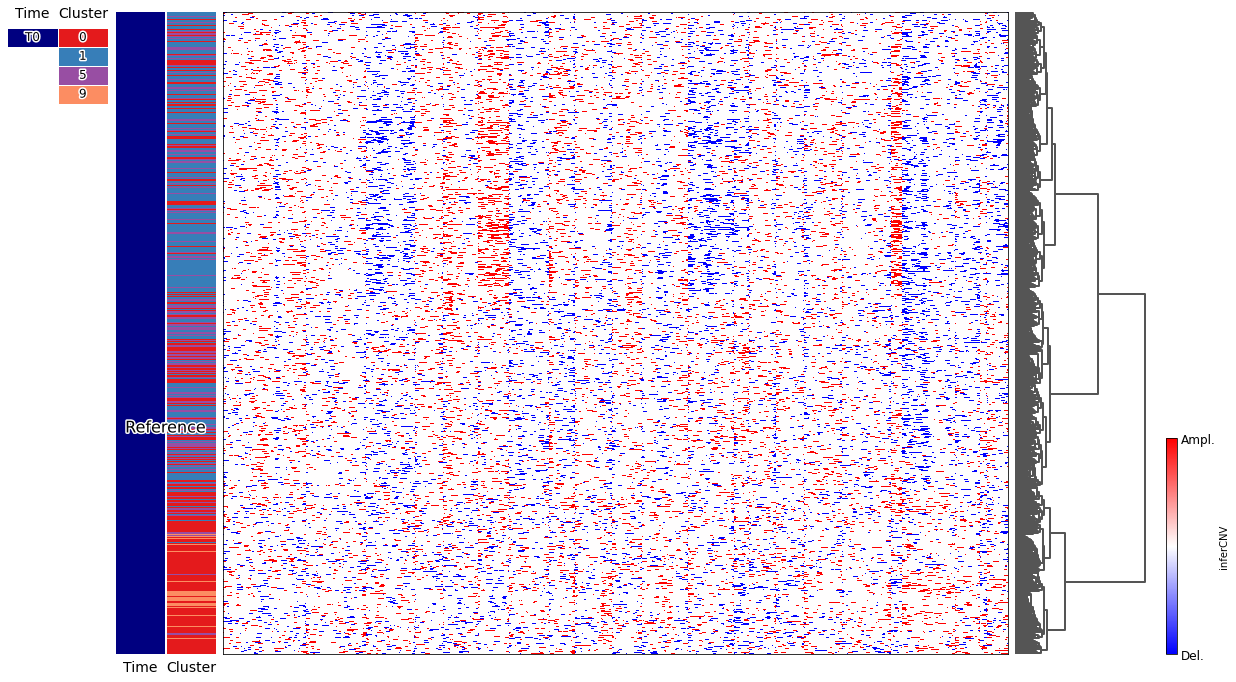

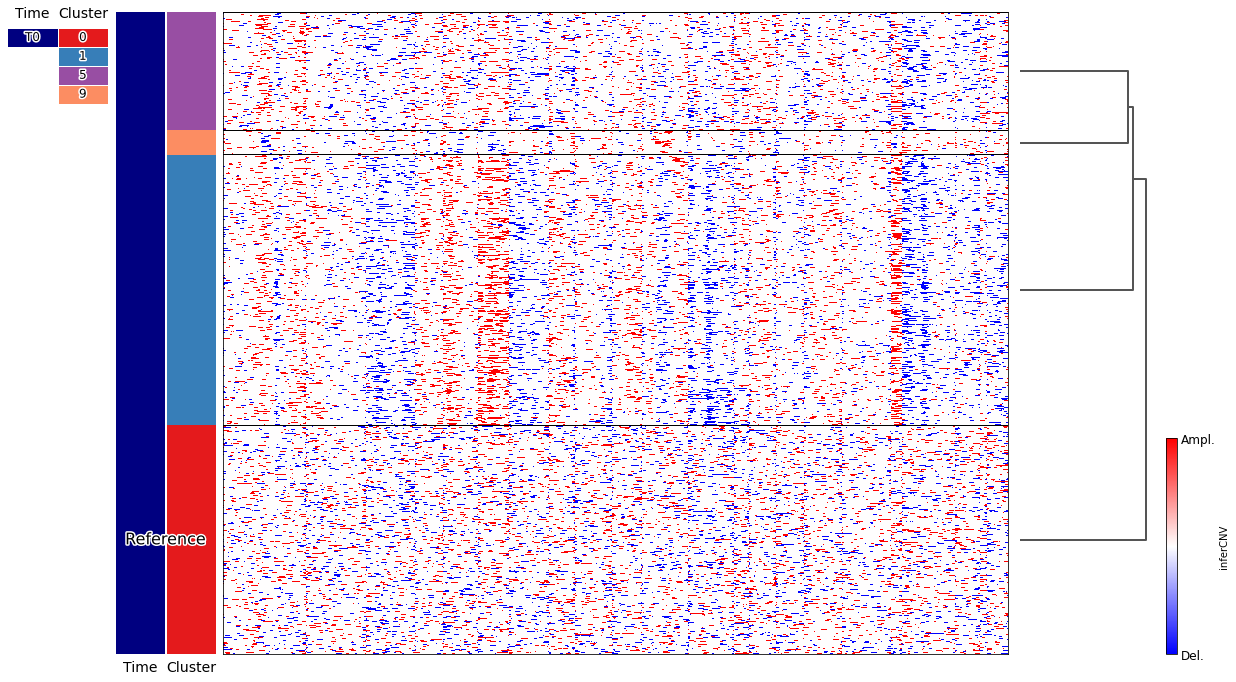

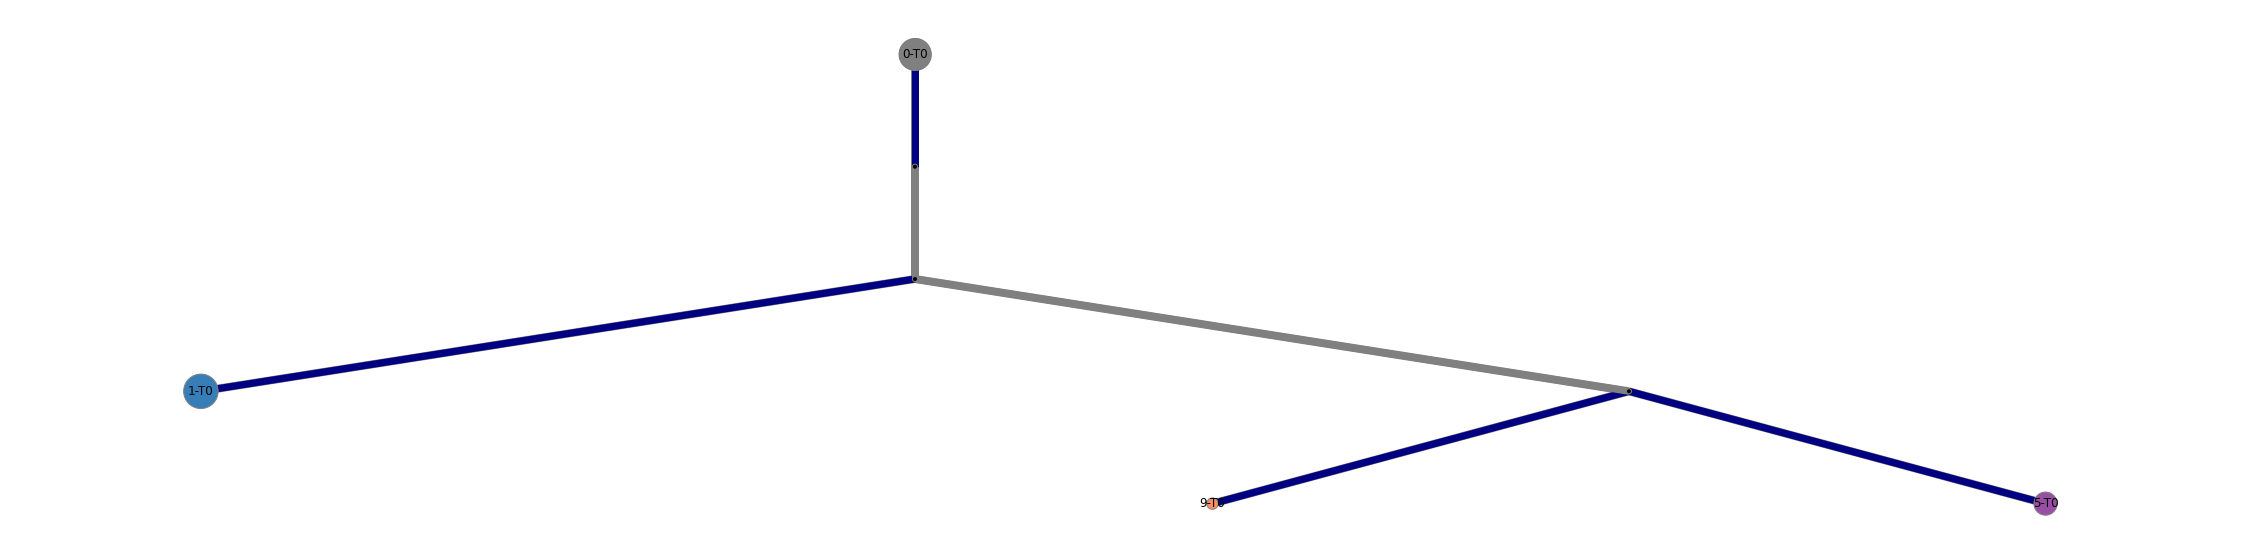

In [21]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T0', label='infer')

Before filtering: (8625, 1986)
After filtering: (8625, 1984)
Using sMED
Could not add reference label
'T0'
Before filtering: (8625, 1986)
After filtering: (8625, 1984)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:39<00:00, 13.04s/it]


Root not found
Could not add reference label
'T0'


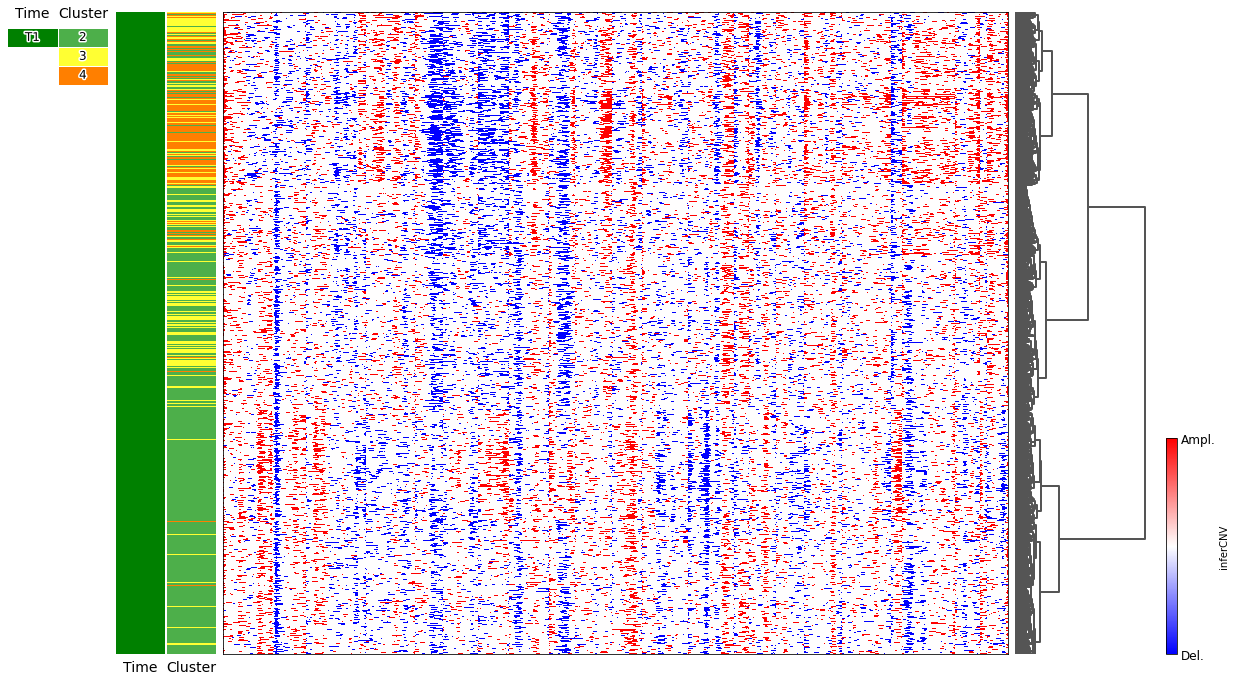

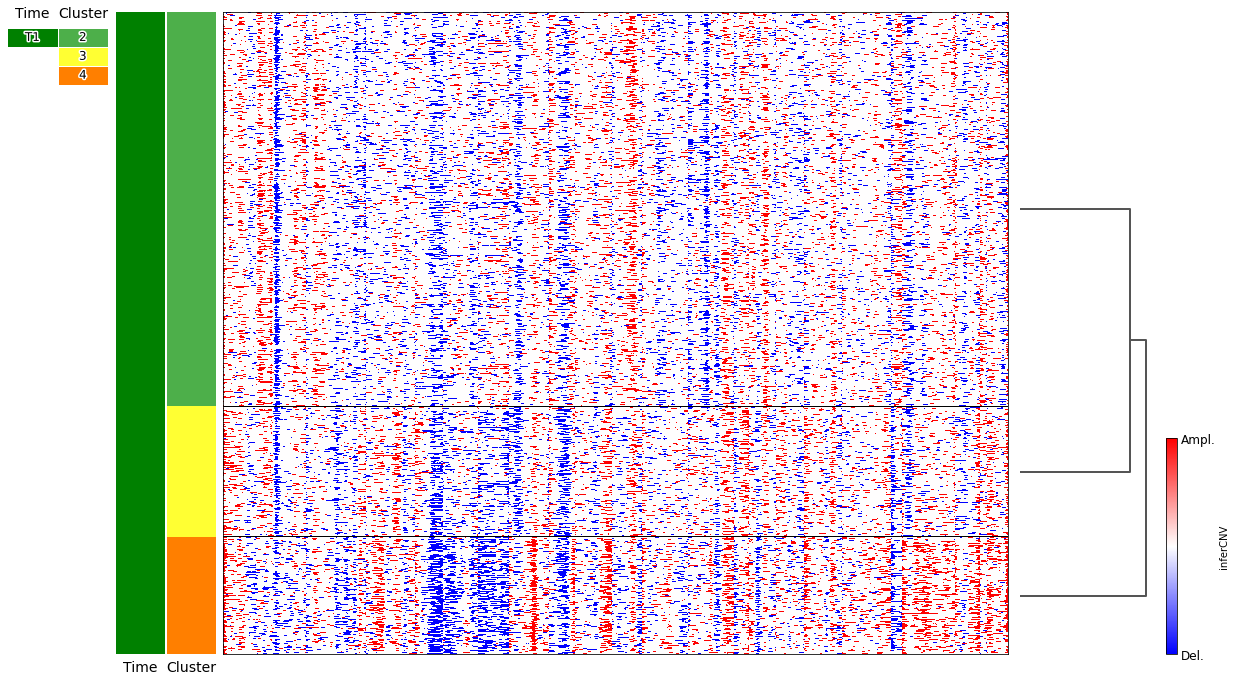

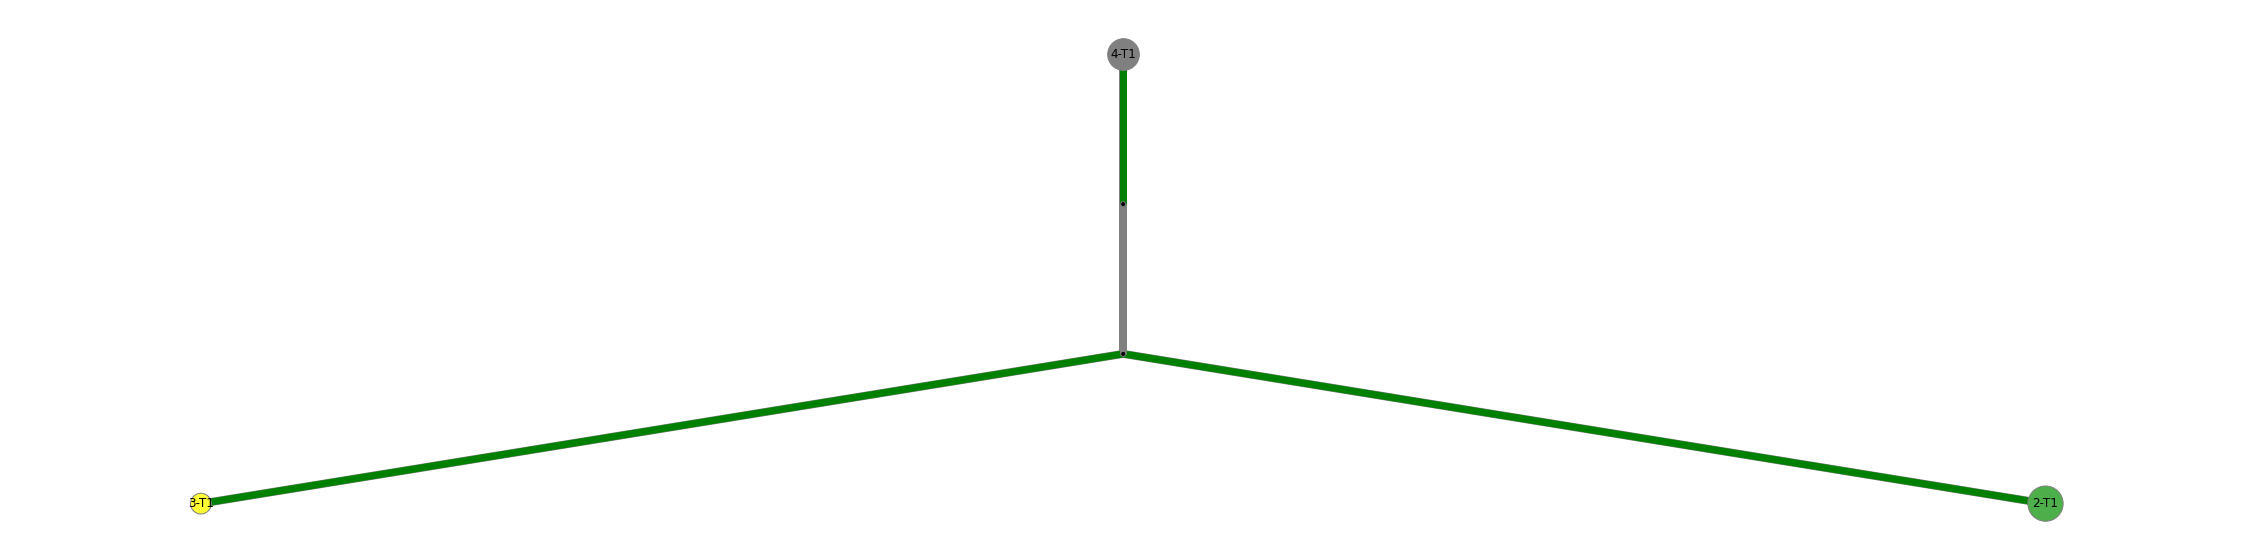

In [22]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T1', label='infer')

Before filtering: (8625, 232)
After filtering: (8625, 230)
Using sMED
Could not add reference label
'T0'
Before filtering: (8625, 232)
After filtering: (8625, 230)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s]


Root not found
Could not add reference label
'T0'


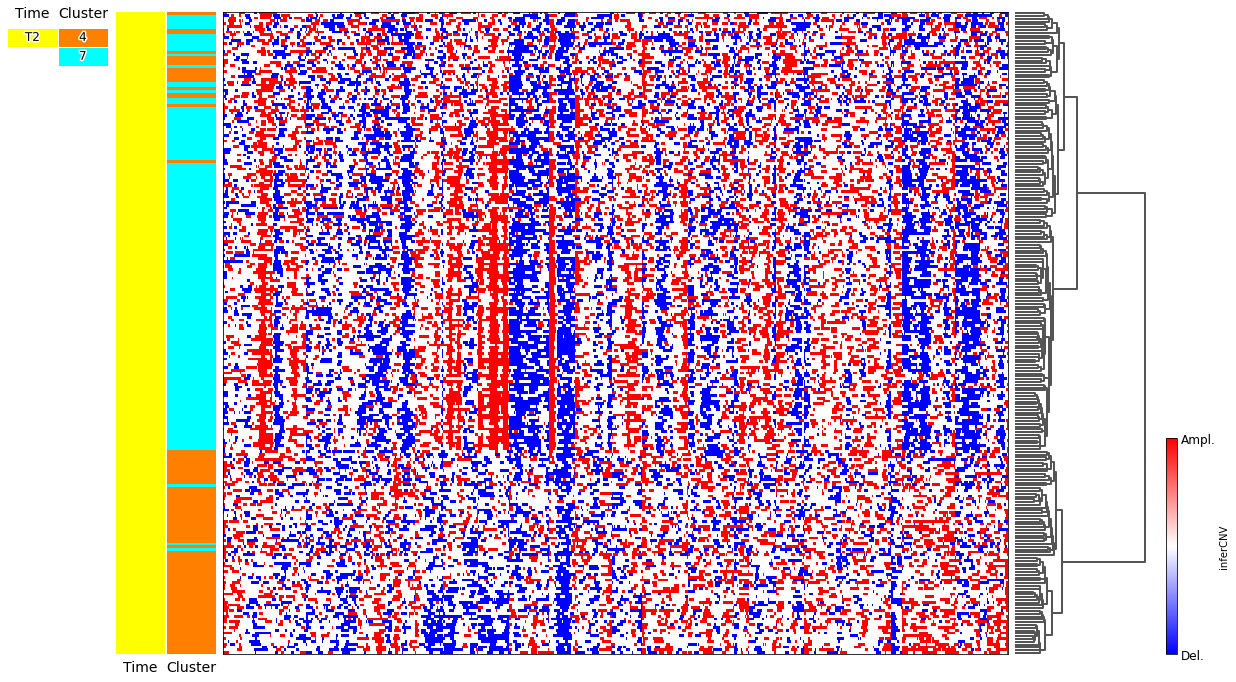

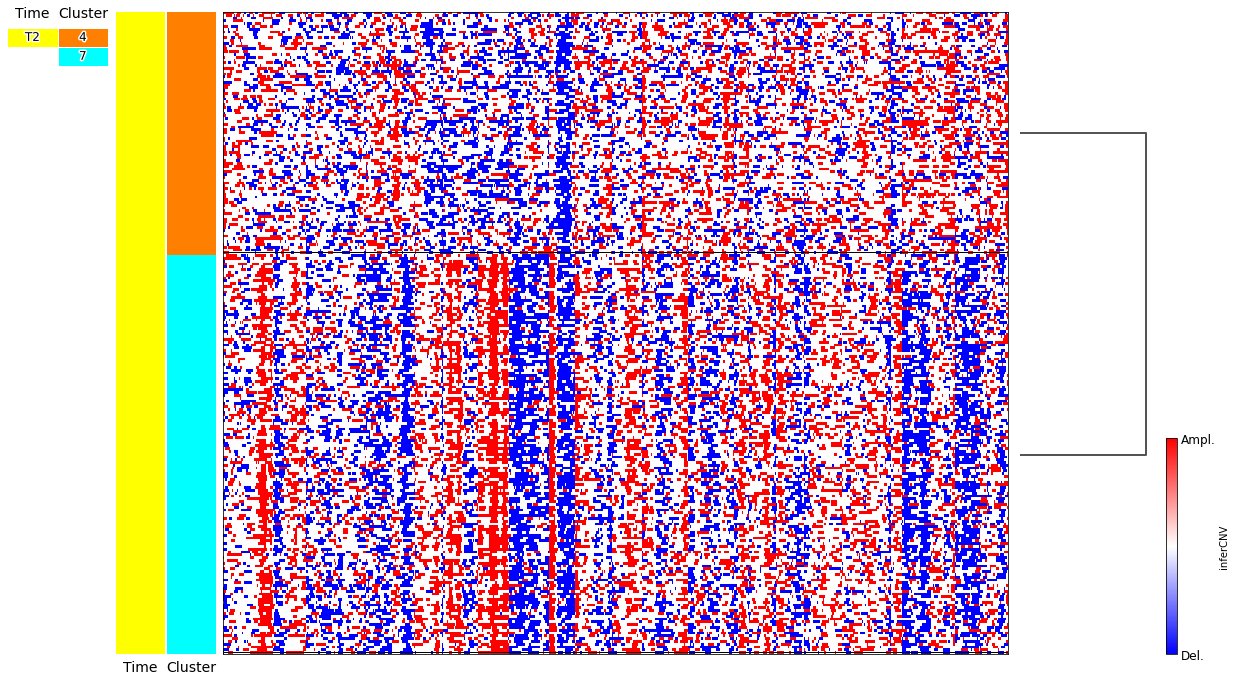

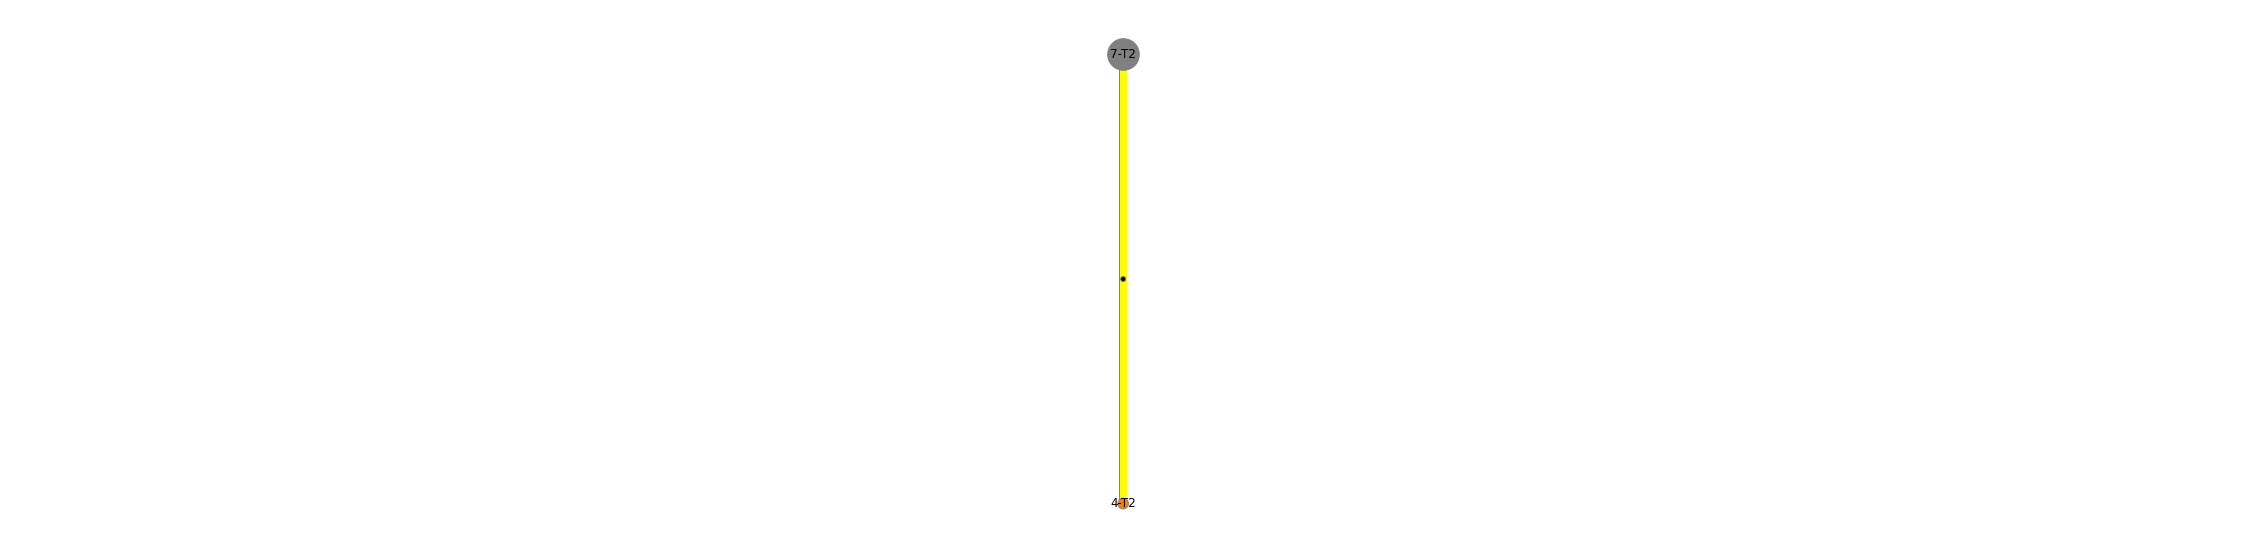

In [23]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T2', label='infer')

Before filtering: (8625, 1281)
After filtering: (8625, 1269)
Using sMED
Could not add reference label
'T0'
Before filtering: (8625, 1281)
After filtering: (8625, 1269)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:27<00:00,  6.90s/it]


Root not found
Could not add reference label
'T0'


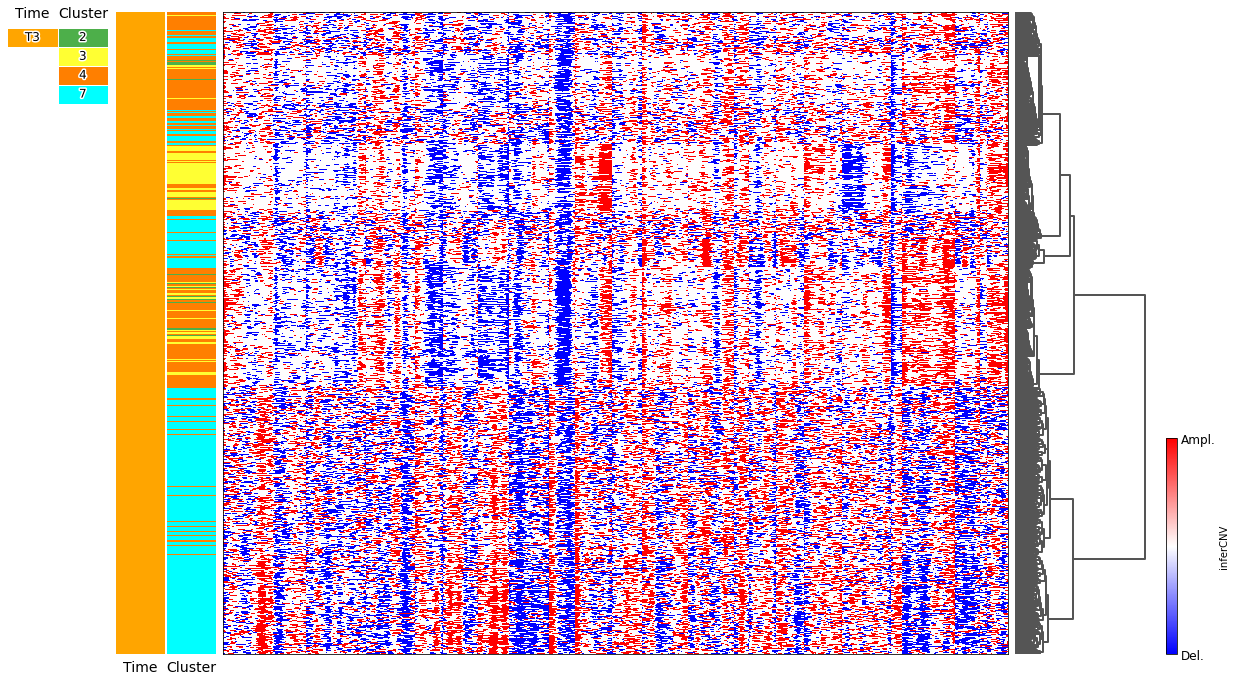

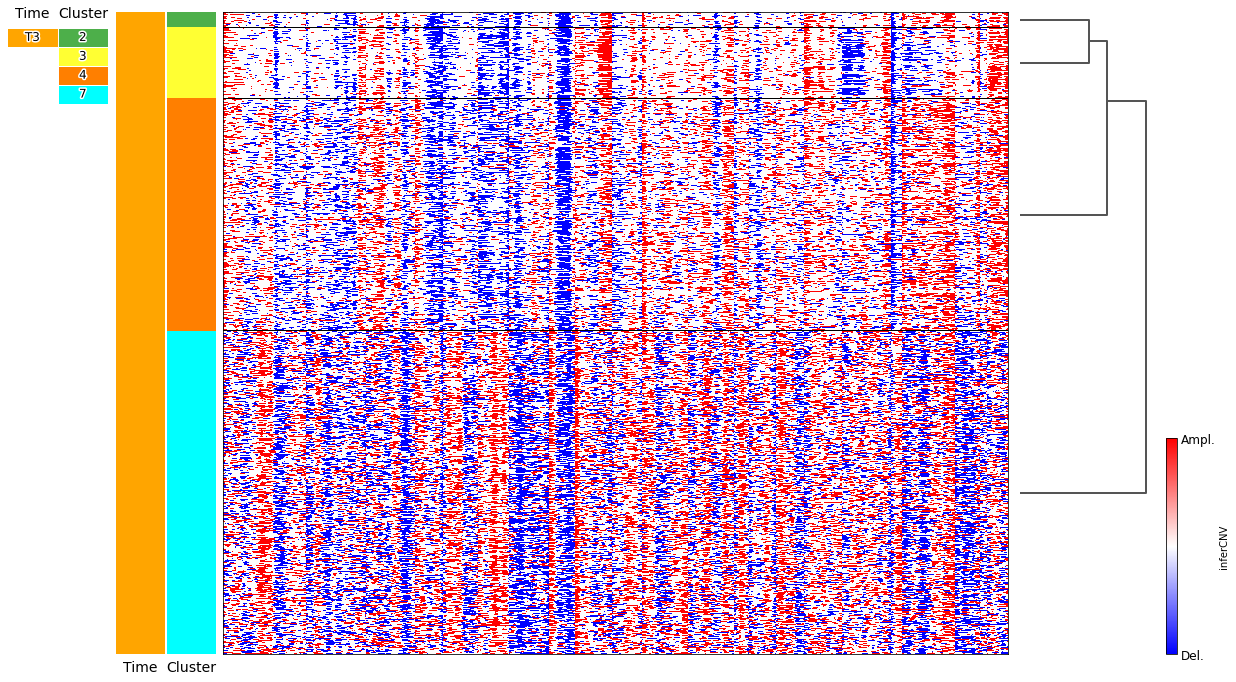

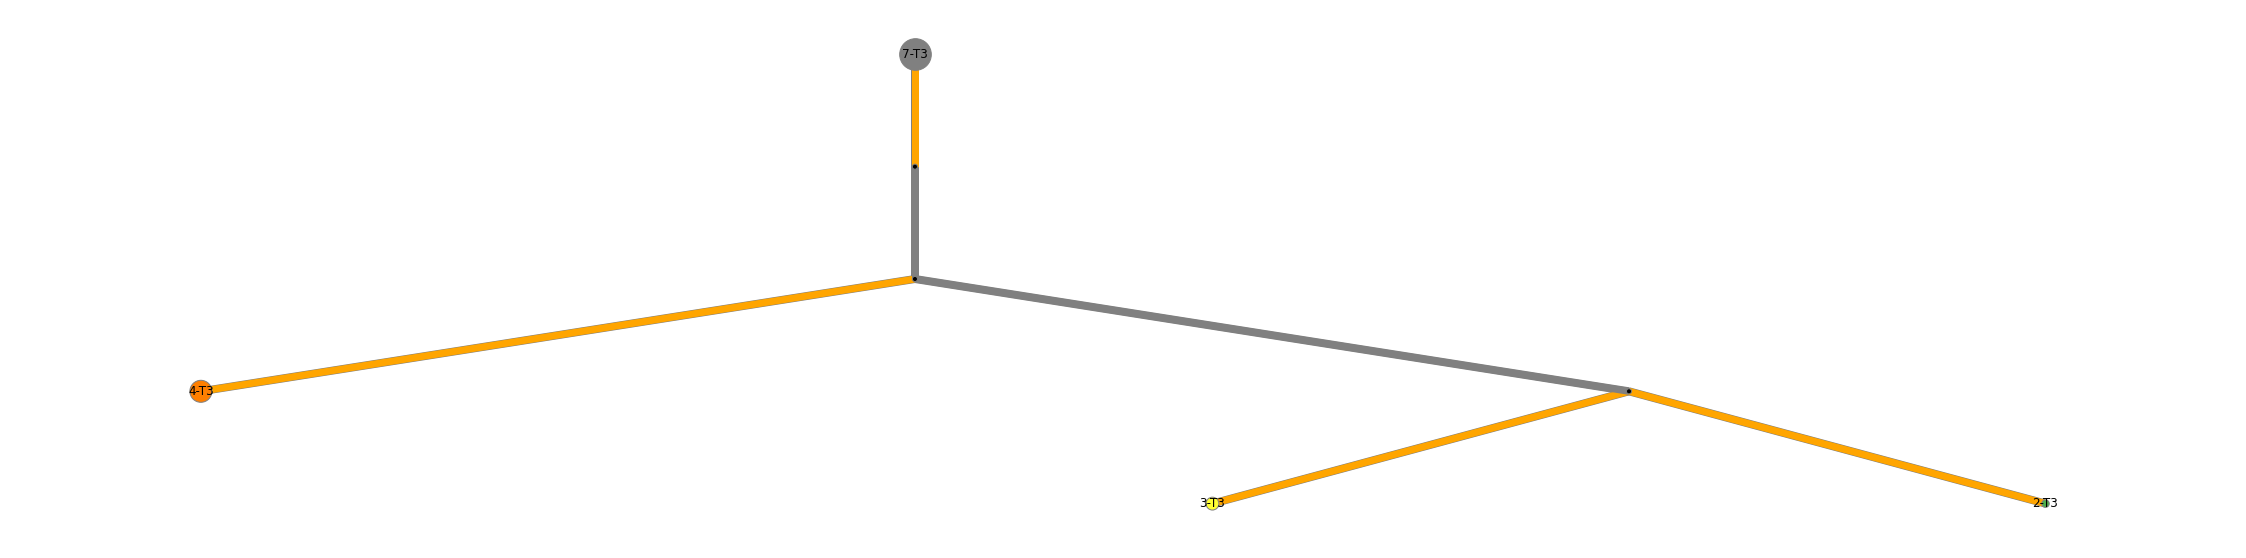

In [24]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T3', label='infer')

Before filtering: (8625, 2228)
After filtering: (8625, 2228)
Using sMED
Could not add reference label
'T0'
Before filtering: (8625, 2228)
After filtering: (8625, 2228)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:46<00:00, 21.27s/it]


Root not found
Could not add reference label
'T0'


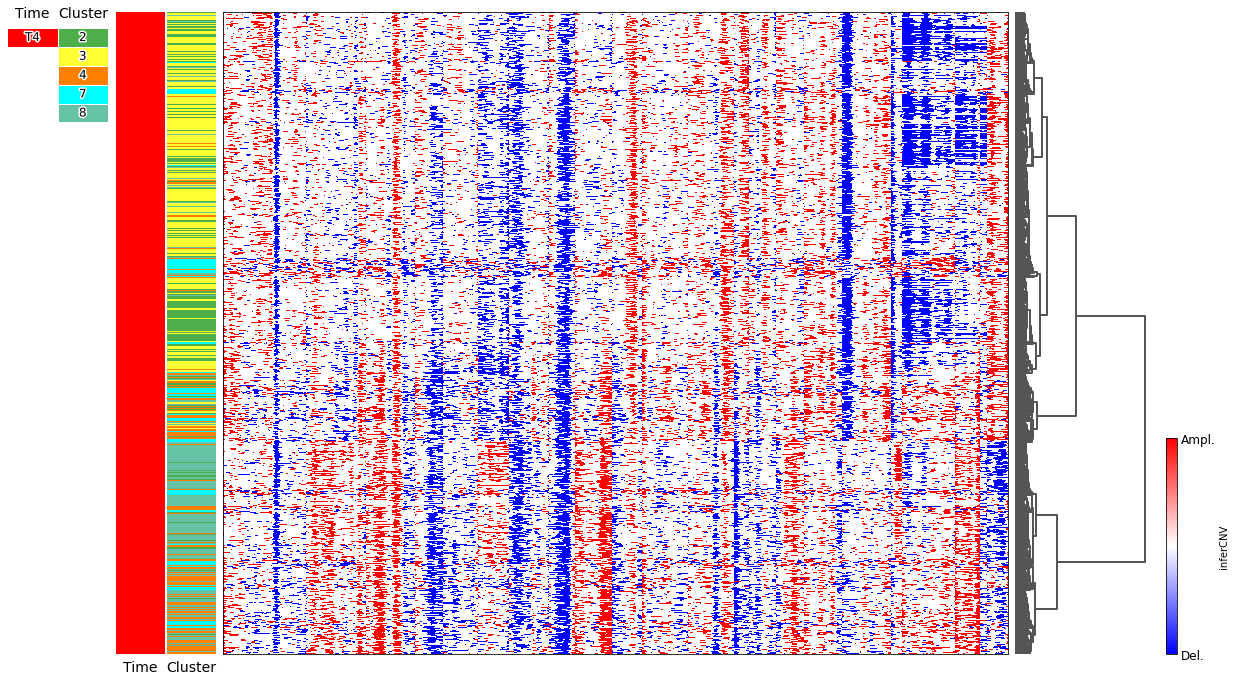

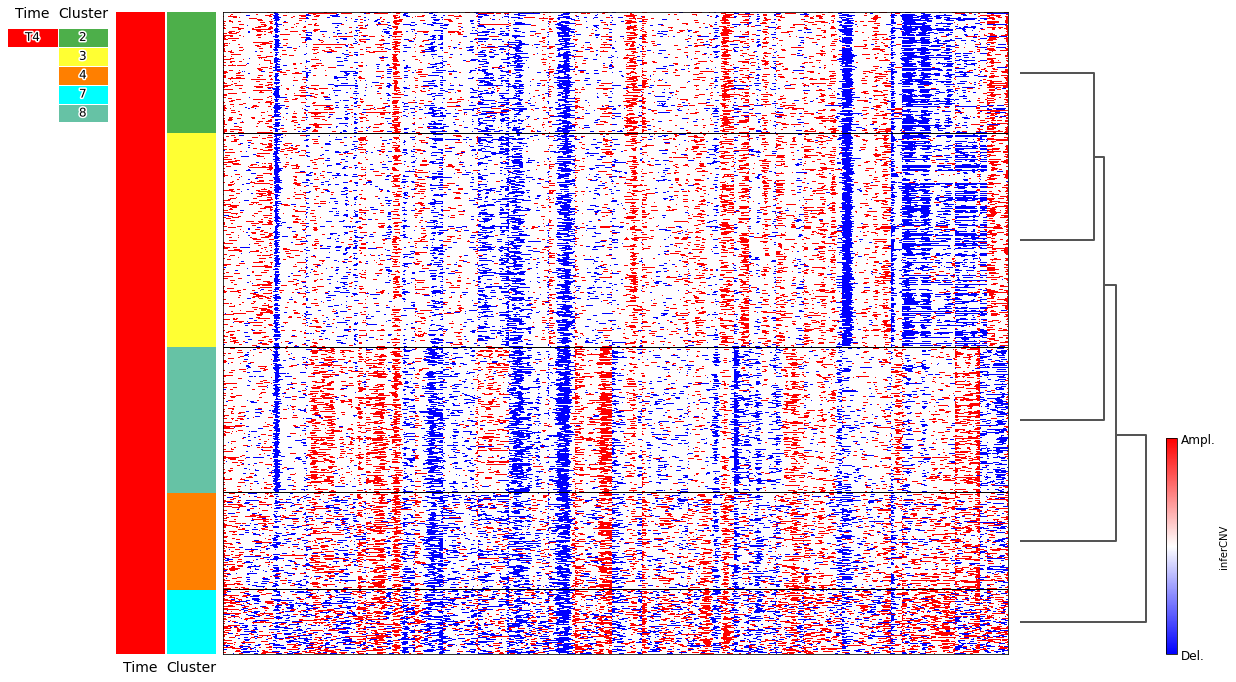

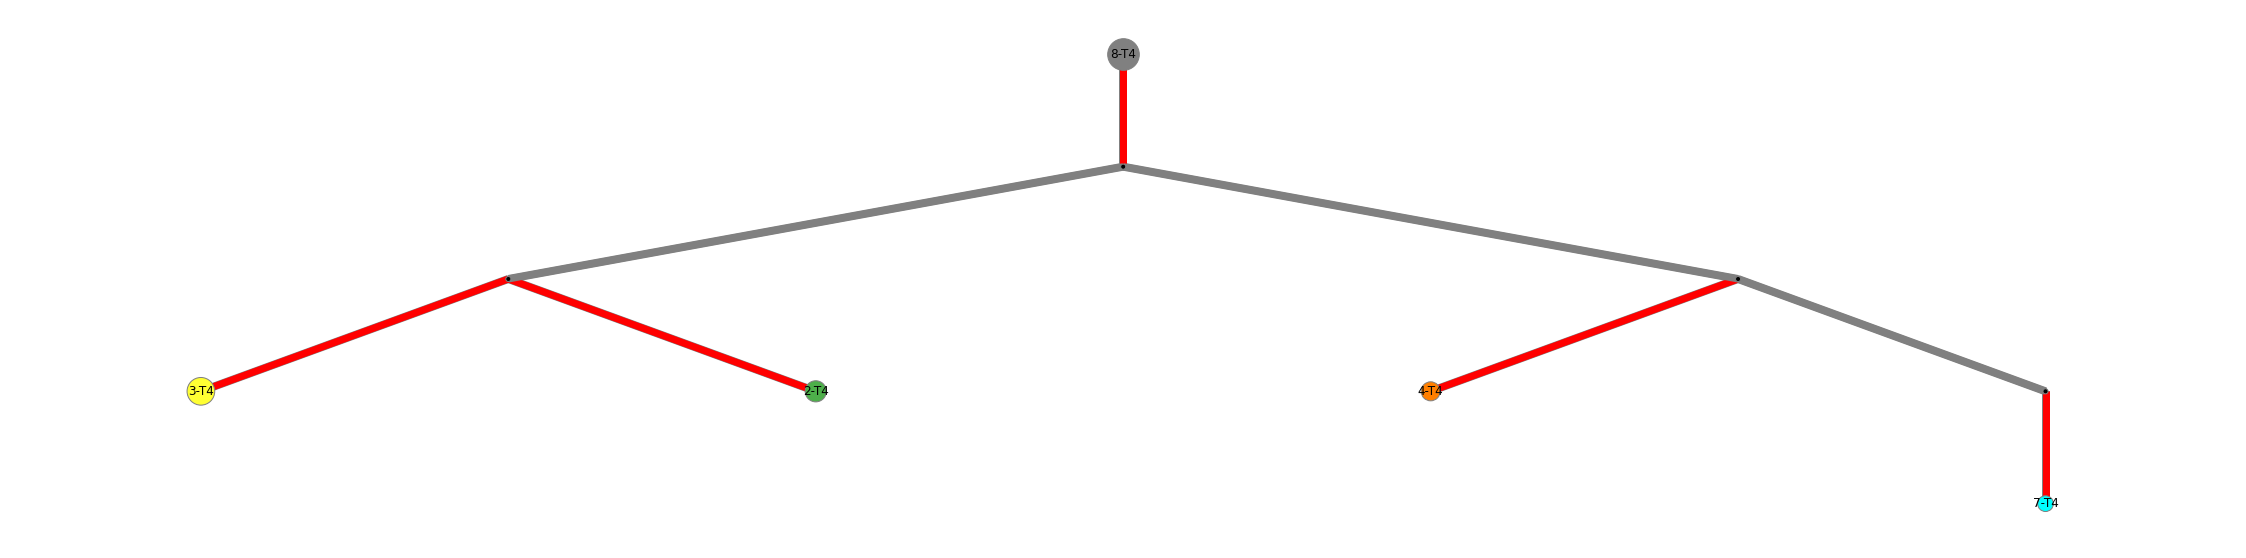

In [25]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T4', label='infer')

# All data together

In [7]:
# Load CNV clusters identities
ad_cnv_obs = sc.read(dataPath + 'ad_all_human_clustered_cnv_%s.h5ad' % model).obs['cnv_clusters']
df_infercnv_meta['lin.'] = ad_cnv_obs.loc[df_infercnv_meta.index]

In [8]:
ad_all = sc.read(dataPath + 'ad_all_human_clustered_st_%s.h5ad' % model)
ad_all = ad_all[ad_all.obs['human_ratio']>=0.25]
filter_spots_index = ad_all.obs.index.copy()
ad_all.X = None

In [9]:
df_infercnv_meta = df_infercnv_meta.loc[df_infercnv_meta.index.isin(filter_spots_index)]
df_infercnv_meta = df_infercnv_meta.loc[~df_infercnv_meta['lin.'].isin(['10'])]

In [10]:
df_infercnv_meta['lin.'].value_counts()

0     1951
2     1505
3     1393
1     1257
5     1195
4     1175
6     1099
7      749
8      259
9      251
10       0
Name: lin., dtype: int64

After filtering: (8625, 10782)


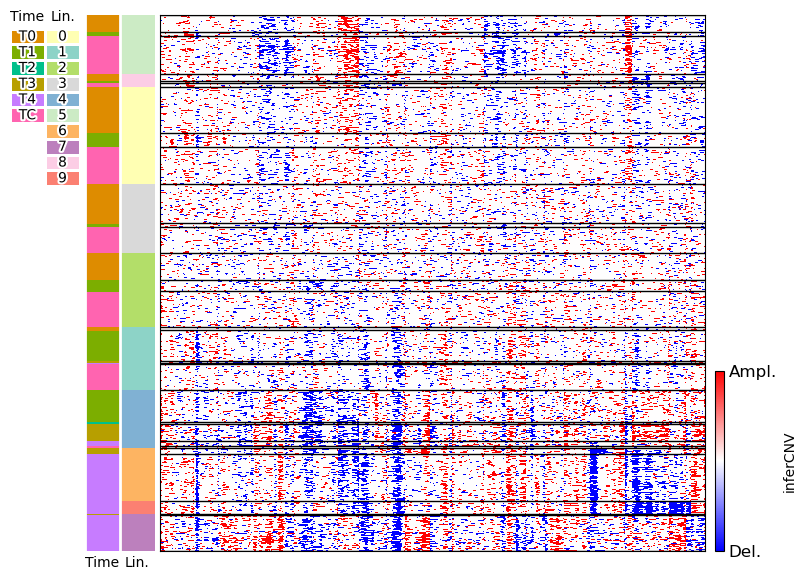

In [16]:
cnv_palette = {str(i): cm.Set3(c-1) for i, c in enumerate([2,1,7,9,5,11,6,10,8,4,3])}
cnv_palette.update({'T0': '#DE8C00', 'T1': '#7CAE00', 'T2': '#00C08B', 'T3': '#B79F00', 'T4': '#C77CFF', 'TC': '#FF64B0', '-1': 'white'})

df_meta_temp = df_infercnv_meta.astype(str)[['time', 'lin.']].sort_values(by=['time'], ascending=False)
df_meta_temp = df_meta_temp.iloc[np.hstack([np.argwhere(df_meta_temp['lin.'].values==str(c)).T[0] for c in reversed([5, 8, 0, 3, 2, 1, 4, 6, 9, 7])])]

resInferCNV = cplot(df_infercnv_cnv[df_meta_temp.index], df_meta_temp, sampleMED=10, seed=0, figsize=(10,9),
            palette=cnv_palette, clusterVar=False, clusterObs=False, addLinesOnHeatmap=True, addLinesOnGroups=False, useMEDforObsGroups=True,
            colorbarLabel='inferCNV',
            saveFig=True, figureName='CNV_WM4007', dpi=500,
            colorbarLabels=['Ampl.', 'Del.'])

After filtering: (8625, 10782)


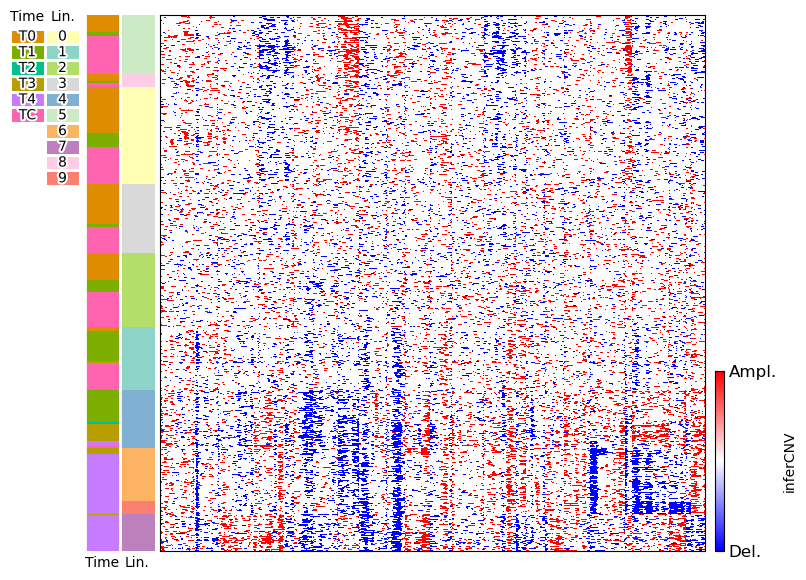

In [13]:
# cnv_palette = {str(i): cm.Set3(c-1) for i, c in enumerate([2,1,7,9,5,11,6,10,8,4,3])}
cnv_palette.update({'T0': '#DE8C00', 'T1': '#7CAE00', 'T2': '#00C08B', 'T3': '#B79F00', 'T4': '#C77CFF', 'TC': '#FF64B0', '-1': 'white'})
cnv_palette.update({str(i): c for i, c in enumerate(['#FFFFB3','#8DD3C7','#B3DE69','#D9D9D9','#80B1D3', '#CCEBC5', '#FDB462', '#BC80BD', '#FCCDE5', '#FB8072', '#BEBADA', '#000080'])})

df_meta_temp = df_infercnv_meta.astype(str)[['time', 'lin.']].sort_values(by=['time'], ascending=False)
df_meta_temp = df_meta_temp.iloc[np.hstack([np.argwhere(df_meta_temp['lin.'].values==str(c)).T[0] for c in reversed([5, 8, 0, 3, 2, 1, 4, 6, 9, 7])])]

resInferCNV = cplot(df_infercnv_cnv[df_meta_temp.index], df_meta_temp, sampleMED=10, seed=0, figsize=(10,9),
            palette=cnv_palette, clusterVar=False, clusterObs=False, addLinesOnHeatmap=False, addLinesOnGroups=False, useMEDforObsGroups=True,
            colorbarLabel='inferCNV',
            saveFig=True, figureName='CNV_WM4007', dpi=500,
            colorbarLabels=['Ampl.', 'Del.'])

### Tree

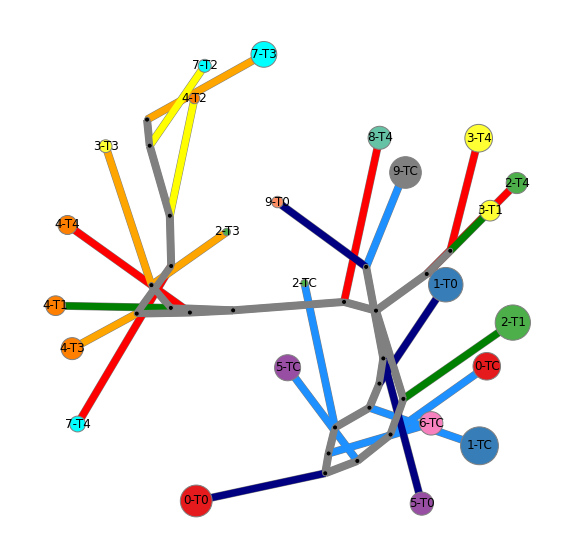

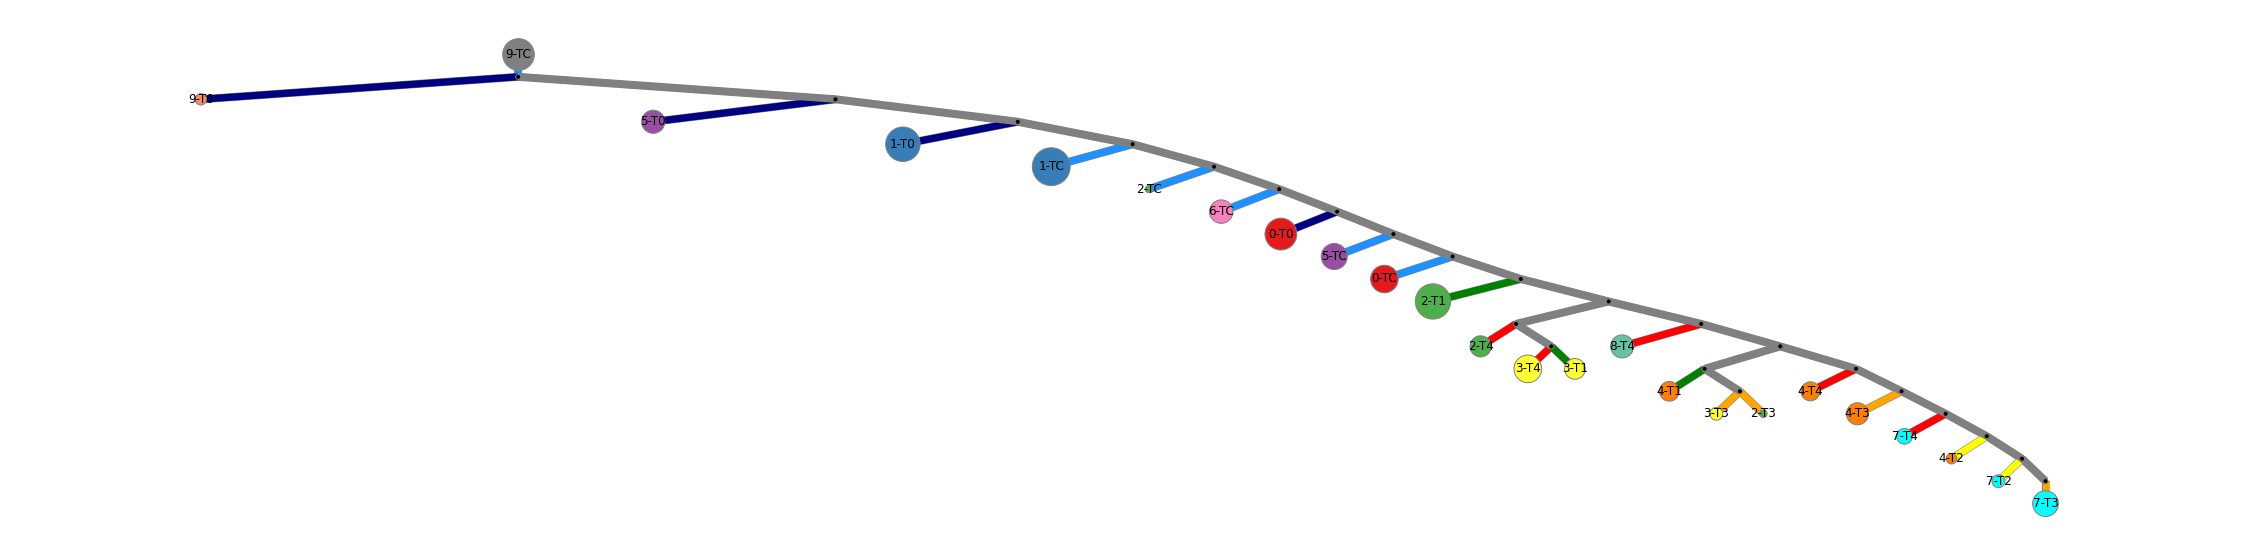

In [28]:
plotTree(*resInferCNV, seed=0, useSpringLayout=True, figsize=(10,10))
plotTree(*resInferCNV, seed=0, useSpringLayout=False)

# Correlation of CNVs across clusters

In [34]:
def viz(df, untreated_clusters=None, treated_clusters=None, figsize=(30,5), groups=None):
    
    def lU(df, i, time, shift=0.15, defsh=1):
        ax.axhline(defsh-i*shift, color='k', linewidth=0.5)
        dfsub = df[df.columns.intersection([(time, cluster) for cluster in untreated_clusters])]
        se = (dfsub-i*shift).mean(axis=1)
        se.plot(alpha=0.8, ax=ax)
        return dfsub.mean(axis=1)

    def lT(df, i, time, shift=0.15, defsh=1):
        ax.axhline(defsh-i*shift, color='k', linewidth=0.5)
        dfsub = df[df.columns.intersection([(time, cluster) for cluster in treated_clusters])]
        se = (dfsub-i*shift).mean(axis=1)
        se.plot(alpha=0.8, ax=ax)
        return dfsub.mean(axis=1)
    
    
    fig, ax = plt.subplots(figsize=figsize)
    for i, (a, b) in enumerate([['T0', 'TC']]):
        print(a, b, np.corrcoef(lU(df, i, a), lU(df, i, b))[0, 1])
    plt.show()
    
    fig, ax = plt.subplots(figsize=figsize)
    for i, (a, b) in enumerate([['T1', 'T2'], ['T2', 'T3'], ['T3', 'T4'], ['T1', 'T3'], ['T1', 'T4']]):
        print(a, b, np.corrcoef(lT(df, i, a), lT(df, i, b))[0, 1])
    plt.show()

    fig, ax = plt.subplots(figsize=figsize)
    print(a:='T1', b:='T4', np.corrcoef(lT(df, 0, a), lT(df, 0, b))[0, 1])
    print(a:='T0', b:='T4', np.corrcoef(lU(df, 1, a), lT(df, 1, b))[0, 1])
    plt.show()
    
    return

T0 TC 0.6408753564849058


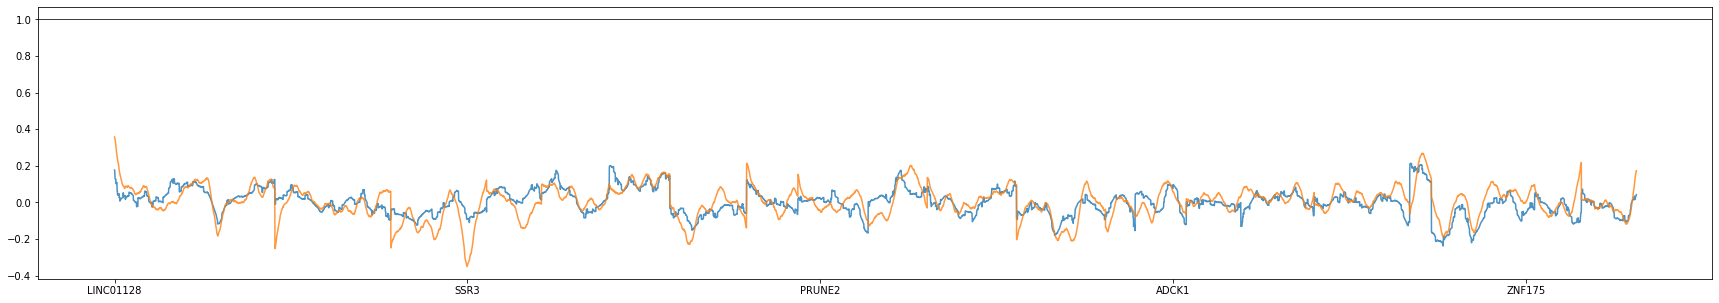

T1 T2 0.6072599764390566
T2 T3 0.7450074265970283
T3 T4 0.8656596797304716
T1 T3 0.8241420550974745
T1 T4 0.7433482229717198


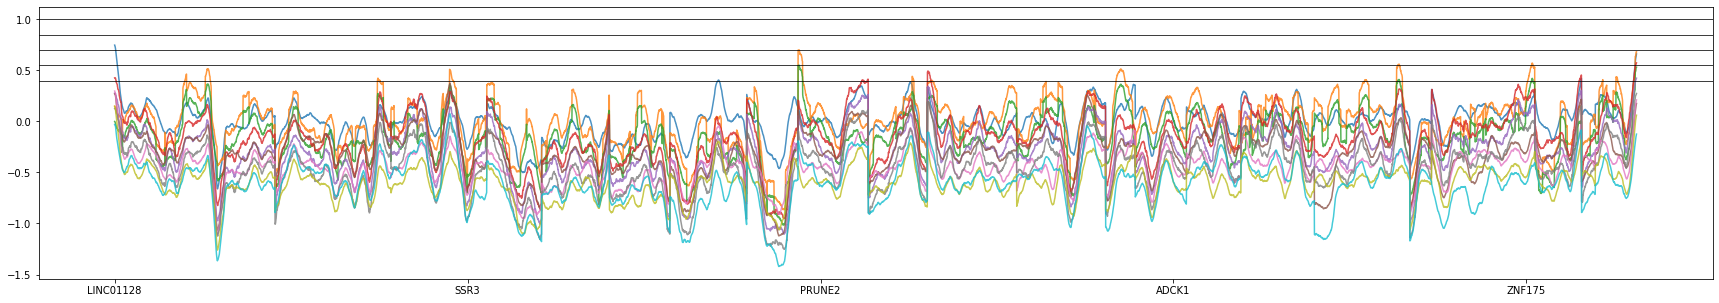

T1 T4 0.7433482229717198
T0 T4 0.09036383438722213


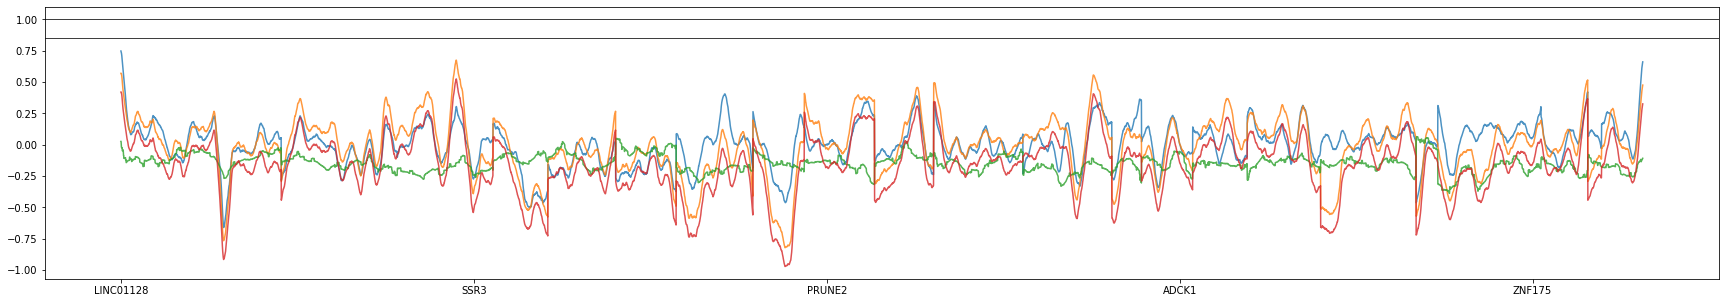

In [35]:
df = df_infercnv_cnv.copy()
df.columns = pd.MultiIndex.from_frame(df_infercnv_meta.loc[df_infercnv_cnv.columns].reset_index().rename({'index': 'spot'}, axis=1))
df = df.groupby(level=['time', 'cluster'], axis=1).mean()
df_g_infercnv_cnv = df.copy()
df_g_infercnv_cnv.shape

viz(df_g_infercnv_cnv, untreated_clusters=['0', '1', '5', '6'], treated_clusters=['2', '3', '4', '7', '8'])

# Correlation analysis
np.corrcoef is the same as "df.corr(method='pearson')" if there are no NaNs but much faster

Before filtering: (5000, 5000)
After filtering: (5000, 4922)


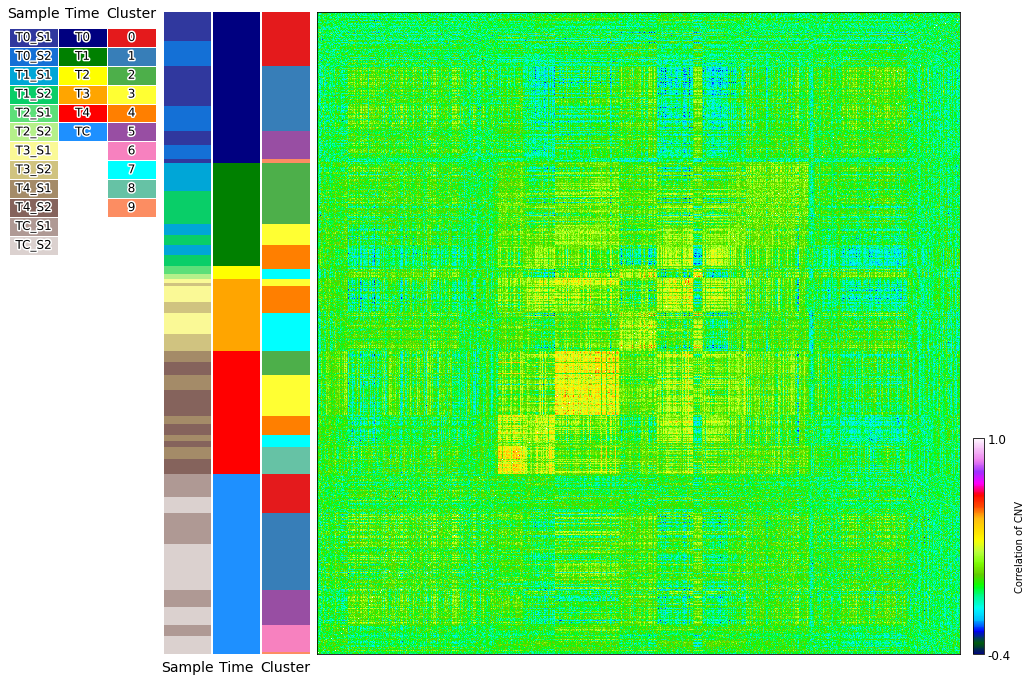

In [37]:
sel_cols = df_infercnv_cnv.sample(5000, axis=1).columns
df_corr_infercnv = pd.DataFrame(data=np.corrcoef(df_infercnv_cnv[sel_cols].T), index=sel_cols, columns=sel_cols)

df_temp, df_meta_temp = df_corr_infercnv, df_infercnv_meta.loc[sel_cols].astype(str)[['sample', 'time', 'cluster']].sort_values(by=['time', 'cluster', 'sample'], ascending=False)
res = cplot(df_temp.loc[df_meta_temp.index, df_meta_temp.index], df_meta_temp, palette=palette1, clusterVar=False, clusterObs=False, linkageMetric='correlation', linkageMethod='average', 
            addLinesOnHeatmap=False, addLinesOnGroups=False, reference=None, colorbarLabel='Correlation of CNV', colorbarLabels=None, keepOriginalOrderObs=False,
            colormap=plt.cm.gist_ncar, figsize=(19,15))